# Анализ базы данных сервиса для чтения книг

**Цель исследования** проанализировать базу данных купленного сервиса для чтения книг по подписке для дальнейшего формулирования ценностного предложения для нового продукта.  
  
**Задачи**
* Познакомиться со структурой базы данных и хранящимися в ней таблицами, выгрузить первые строки.
* Выполнить и проанализировать результаты следующих запросов:
    * Посчитайте, сколько книг вышло после 1 января 2000 года;
    * Для каждой книги посчитайте количество обзоров и среднюю оценку;
    * Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
    * Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
    * Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.  

**Cтруктура таблиц**  
Данные расположены в 5 таблицах и содержат информацию о книгах, авторах, издательствах, пользовательских оценках и обзорах.  

Таблица **books**  
Содержит данные о книгах:
* book_id — идентификатор книги;
* author_id — идентификатор автора;
* title — название книги;
* num_pages — количество страниц;
* publication_date — дата публикации книги;
* publisher_id — идентификатор издателя.  

Таблица **authors**  
Содержит данные об авторах:
* author_id — идентификатор автора;
* author — имя автора.  

Таблица **publishers**  
Содержит данные об издательствах:
* publisher_id — идентификатор издательства;
* publisher — название издательства;  

Таблица **ratings**  
Содержит данные о пользовательских оценках книг:
* rating_id — идентификатор оценки;
* book_id — идентификатор книги;
* username — имя пользователя, оставившего оценку;
* rating — оценка книги.  

Таблица **reviews**  
Содержит данные о пользовательских обзорах:
* review_id — идентификатор обзора;
* book_id — идентификатор книги;
* username — имя автора обзора;
* text — текст обзора.


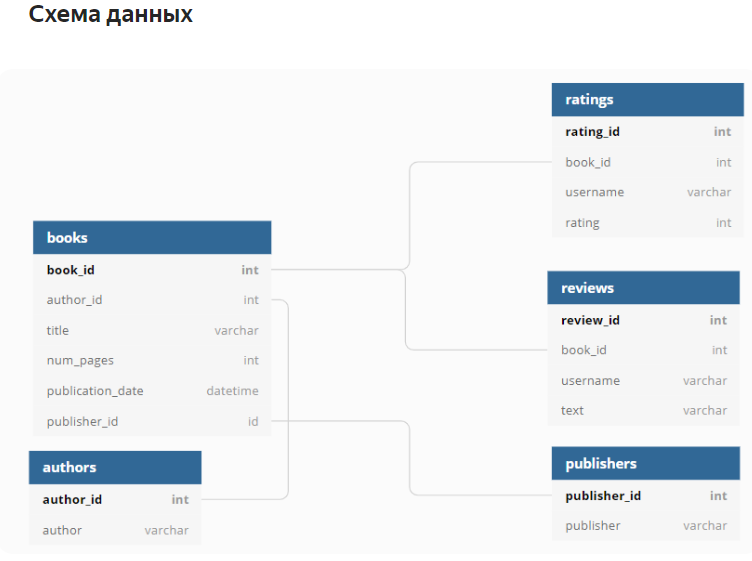

# Выгрузка данных

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [3]:
query = ''' 
SELECT *
FROM books
LIMIT 5
'''

pd.io.sql.read_sql(query, con = engine) 

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [4]:
query = ''' 
SELECT *
FROM authors
LIMIT 5
'''

pd.io.sql.read_sql(query, con = engine) 

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [5]:
query = ''' 
SELECT *
FROM ratings
LIMIT 5
'''

pd.io.sql.read_sql(query, con = engine) 

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [6]:
query = ''' 
SELECT *
FROM reviews
LIMIT 5
'''

pd.io.sql.read_sql(query, con = engine) 

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [7]:
query = ''' 
SELECT *
FROM publishers
LIMIT 5
'''

pd.io.sql.read_sql(query, con = engine) 

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


Все таблицы выгружаются корректно можно работать с запросами.

# Выполнение запросов

## Посчитайте, сколько книг вышло после 1 января 2000 года;

In [8]:
query = ''' 
SELECT COUNT(book_id)
FROM books
WHERE publication_date > '2000-01-01'
'''

pd.io.sql.read_sql(query, con = engine) 

,count
0,819


После 1 января 2000 года было выпущено 891 книг.

## Для каждой книги посчитайте количество обзоров и среднюю оценку

In [9]:
query = ''' 
SELECT b.title,
       COUNT(DISTINCT r.review_id) as reviews_count,
       ROUND(AVG(rt.rating),3) as avg_rating
FROM books as b 

LEFT JOIN reviews AS r ON b.book_id = r.book_id
LEFT JOIN ratings AS rt ON b.book_id = rt.book_id

GROUP BY b.title
ORDER BY reviews_count DESC
'''

pd.io.sql.read_sql(query, con = engine) 

,title,reviews_count,avg_rating
0,Memoirs of a Geisha,8,4.138
1,Twilight (Twilight #1),7,3.663
2,Harry Potter and the Chamber of Secrets (Harry...,6,4.288
3,The Glass Castle,6,4.207
4,Eat Pray Love,6,3.396
...,...,...,...
994,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.667
995,The Natural Way to Draw,0,3.000
996,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.000
997,Essential Tales and Poems,0,4.000


В базе числится 999 книг. Наибольшее количество обзоров у книги "Мемуары гейши" - 8 шт. Есть так же книги без обзоров. Количество обзоров и рейтигн книг не имеют особой связи, так как рейтинг это оценка пользователей и зависит от предпочтений и особенностей читателя.

## Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;

In [10]:
query = ''' 
SELECT p.publisher,
       COUNT(b.book_id) as book_count
       
       
FROM books as b

INNER JOIN publishers AS p
ON b.publisher_id = p.publisher_id


WHERE b.num_pages > 50

GROUP BY p.publisher
ORDER BY book_count DESC

LIMIT 1
'''

pd.io.sql.read_sql(query, con = engine) 

,publisher,book_count
0,Penguin Books,42


Больше всего книг (не брошюр,более 50 страниц) было выпущено издательством **Penguin Books** - 42 книги.  
Издательство **Penguin** было основано в 1935 году и произвело революцию на издательском рынке, сочетая высокое качество книг с низкими ценами

## Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [11]:
query = ''' 
WITH


id AS (SELECT book_id,
       COUNT(rating_id)
FROM ratings
GROUP BY book_id
HAVING COUNT(rating_id) > 50)

SELECT a.author,
       ROUND(AVG(r.rating),3) as avg_rating
FROM books as b

JOIN id ON b.book_id = id.book_id
JOIN authors AS a ON a.author_id = b.author_id
JOIN ratings AS r ON id.book_id = r.book_id

GROUP BY a.author
ORDER BY avg_rating DESC

LIMIT 1

'''

pd.io.sql.read_sql(query, con = engine) 

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.287


Наивысший  средний рейтинг из авторов, чьи книги набрали более 50 оценок у Джоан Роулинг, написавшей всем знакомые и многими любимые книги о Гарри Поттере причем в сотрудничестве с иллюстратором Мери Грапрэ. Грандпре проиллюстрировала все американские издания книг о Гарри Поттере.

## Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [12]:
query = ''' 
SELECT COUNT(review_id)/ COUNT(DISTINCT username) AS avg_rw_count
FROM reviews 
WHERE username in ( 
                    SELECT username
                    FROM ratings
                    GROUP BY username
                    HAVING COUNT(rating_id) > 50
                    )
       

'''

pd.io.sql.read_sql(query, con = engine) 

,avg_rw_count
0,24


В среднем пользователи поставившие более 50 оценок пишут 24 обзора на книги.